In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

### Data Preparation

The data was taken from the 2022 StackOverflow Developer Survey : https://insights.stackoverflow.com/survey

In [95]:
df = pd.read_csv("./Datasets/survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [96]:
#Removing unwanted features

df = df[["Country", "EdLevel","YearsCode","Employment", "ConvertedCompYearly"]]

#Rename the ConvertedCompYearly column to Salary
df = df.rename({"ConvertedCompYearly" : "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,"Employed, full-time",NaN


In [97]:
# Eliminate records where the salary is NaN
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time;Independent contractor, fr...",194400.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     38071 non-null  object 
 1   EdLevel     38054 non-null  object 
 2   YearsCode   38001 non-null  object 
 3   Employment  38067 non-null  object 
 4   Salary      38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [99]:
# Dropping all recors from all columns with NaN values
df.dropna(inplace=True)
df.isna().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [100]:
# We only need the values where the employment is of type full time
df =df[df["Employment"] == "Employed, full-time"]

# Dropping Employment Column as it is not needed for prediction
df.drop("Employment",axis=1,inplace=True)


df.head()

,Country,EdLevel,YearsCode,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,65000.0


In [101]:
df["Country"].value_counts()

Country
United States of America                                7867
Germany                                                 2388
United Kingdom of Great Britain and Northern Ireland    2344
India                                                   1877
Canada                                                  1251
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [102]:
# Eliminate countries with few values

def shorten(categories,cutoff):
    cat_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            cat_map[categories.index[i]] = categories.index[i]
        else:
            cat_map[categories.index[i]] = "Other"

    return cat_map        

In [103]:
country_map = shorten(df.Country.value_counts(),400)
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
Other                                                   8659
United States of America                                7867
Germany                                                 2388
United Kingdom of Great Britain and Northern Ireland    2344
India                                                   1877
Canada                                                  1251
France                                                  1128
Brazil                                                  1015
Spain                                                    858
Netherlands                                              702
Australia                                                702
Italy                                                    668
Poland                                                   574
Sweden                                                   560
Russian Federation                                       424
Switzerland                                              416
Name: count, dty

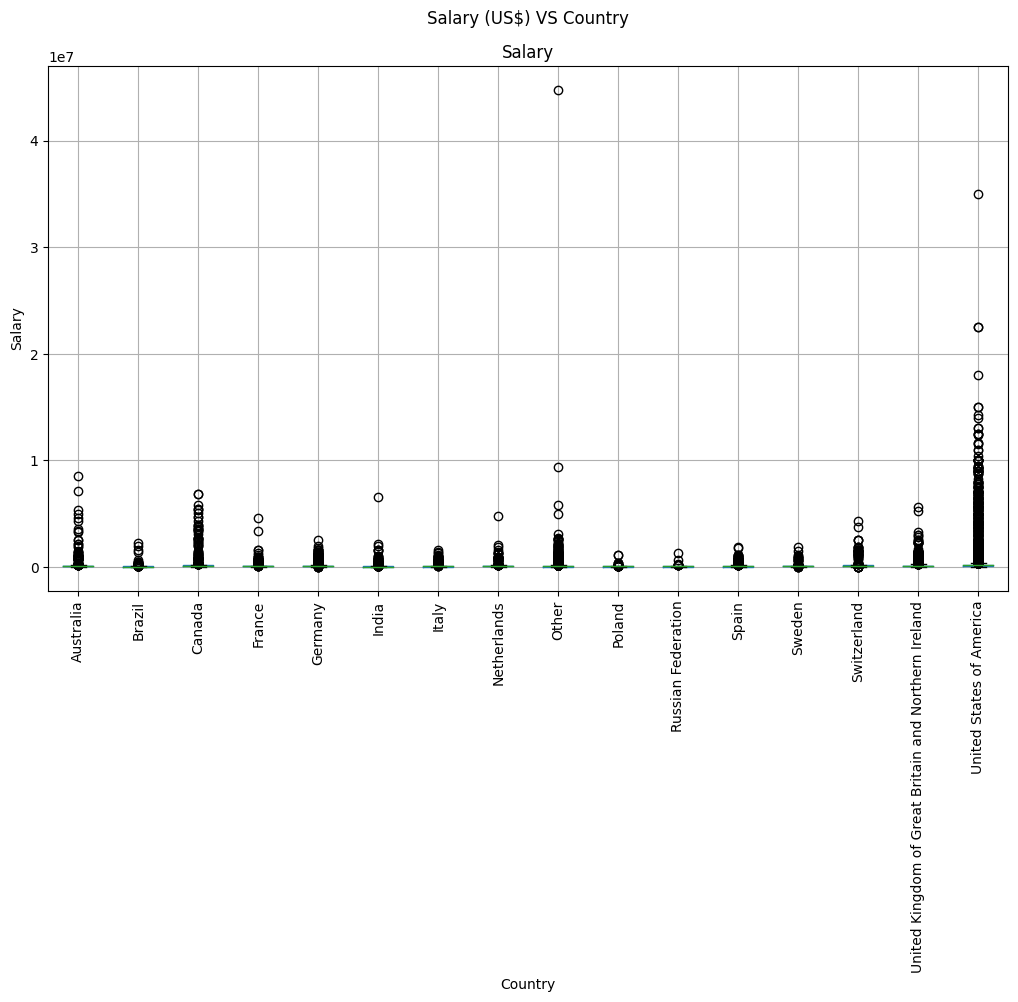

In [104]:
fig,ax = plt.subplots(1,1,figsize = (12,7))

df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) VS Country")
plt.ylabel("Salary")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()

In [105]:
df = df[df["Salary"] <= 300000]
df = df[df["Salary"] > 10000]
df = df[df["Country"] != "Other"]


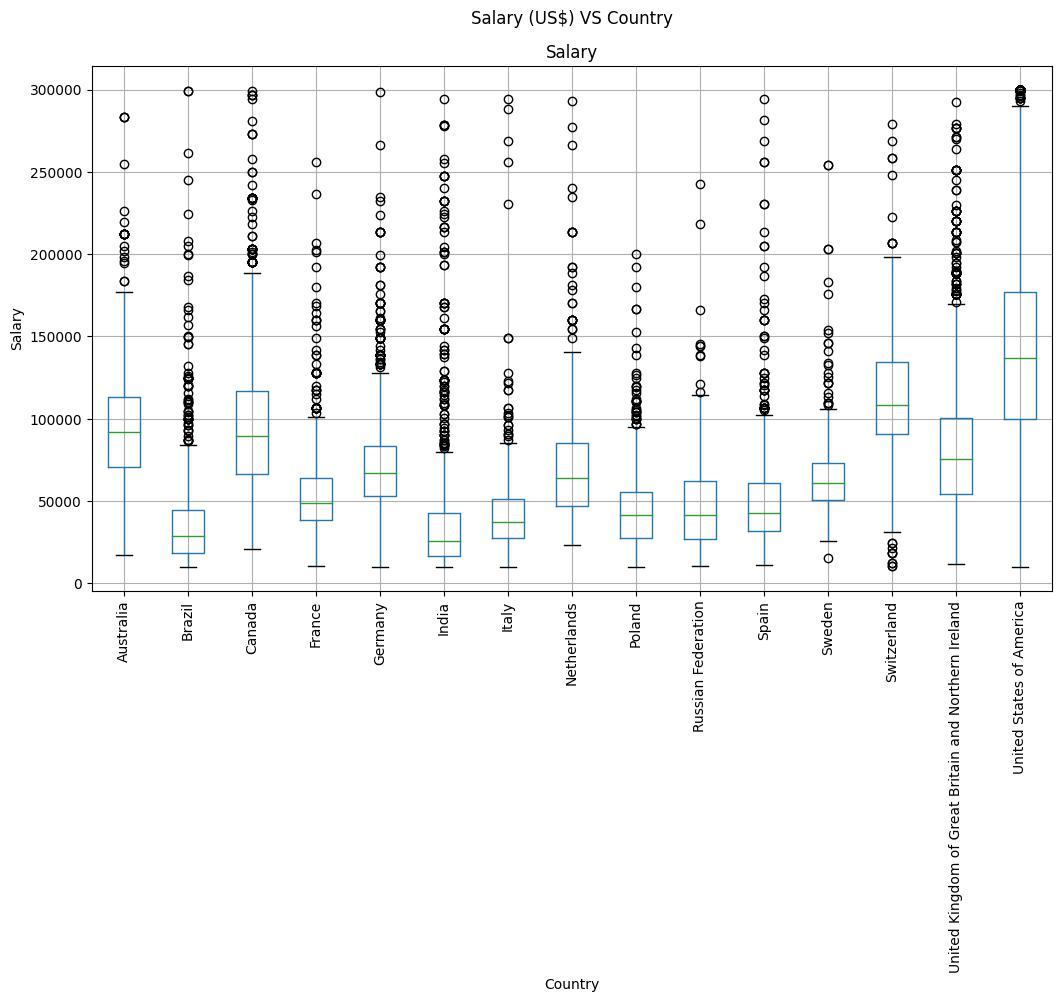

In [106]:
fig,ax = plt.subplots(1,1,figsize = (12,7))

df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) VS Country")
plt.ylabel("Salary")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()

In [107]:
df["YearsCode"].unique()

array(['14', '6', '5', '12', '25', '16', '10', '20', '24', '40', '7',
       '15', '9', '4', '17', '18', '13', '30', '22', '8', '32', '26',
       '29', '11', '3', '28', '19', '23', '43', '48', '38', '21', '27',
       'Less than 1 year', '37', '31', '35', '2', '36', '42', '34', '46',
       '45', '1', '33', '41', '44', 'More than 50 years', '39', '47',
       '50', '49'], dtype=object)

In [108]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50.0
    if x == "Less than 1 year":
        return 0.5
    
    return float(x)

    

In [109]:

df["YearsCode"] = df["YearsCode"].apply(clean_experience)
df["YearsCode"].unique()

array([14. ,  6. ,  5. , 12. , 25. , 16. , 10. , 20. , 24. , 40. ,  7. ,
       15. ,  9. ,  4. , 17. , 18. , 13. , 30. , 22. ,  8. , 32. , 26. ,
       29. , 11. ,  3. , 28. , 19. , 23. , 43. , 48. , 38. , 21. , 27. ,
        0.5, 37. , 31. , 35. ,  2. , 36. , 42. , 34. , 46. , 45. ,  1. ,
       33. , 41. , 44. , 50. , 39. , 47. , 49. ])

In [110]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [111]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in  x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral degree" in x:
        return "Post Grad"
    return "Less than Bachelor's"

In [112]:
df["EdLevel"] = df["EdLevel"].apply(clean_education)
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', "Less than Bachelor's",
       'Post Grad'], dtype=object)

#### Encoding Data

Converting categorical data into numbers 

In [113]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
df["EdLevel"] = le_encoder.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([2, 0, 1, 3])

In [114]:
le_encoder2 = LabelEncoder()
df["Country"] = le_encoder2.fit_transform(df["Country"])
df["Country"].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])